In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import glob
import os

%matplotlib inline

In [139]:
results_dir='/home/samuel/data/drift_tool_test/salish_test_20170416/output/'
# Use glob to find all netcdf files in results_dir
files = glob.glob(os.path.join(results_dir, '*.nc'))

In [140]:
files

['/home/samuel/data/drift_tool_test/salish_test_20170416/output/salishseacast_ar_2017042000_P1D-604_1491894016.nc',
 '/home/samuel/data/drift_tool_test/salish_test_20170416/output/salishseacast_ar_2017041900_P1D-602_1491901137.nc',
 '/home/samuel/data/drift_tool_test/salish_test_20170416/output/salishseacast_ar_2017041900_P1D-626_1491932630.nc',
 '/home/samuel/data/drift_tool_test/salish_test_20170416/output/salishseacast_ar_2017042000_P1D-125_1491883655.nc',
 '/home/samuel/data/drift_tool_test/salish_test_20170416/output/salishseacast_ar_2017042000_P1D-133_1491850385.nc',
 '/home/samuel/data/drift_tool_test/salish_test_20170416/output/salishseacast_ar_2017041900_P1D-615_1491972004.nc',
 '/home/samuel/data/drift_tool_test/salish_test_20170416/output/salishseacast_ar_2017041900_P1D-612_1492006399.nc',
 '/home/samuel/data/drift_tool_test/salish_test_20170416/output/salishseacast_ar_2017042000_P1D-593_1492105641.nc',
 '/home/samuel/data/drift_tool_test/salish_test_20170416/output/salishse

In [145]:
unique_list =[]
for file in files:
    # Open dataset
    ds = xr.open_dataset(file)
    drift_id = ds.obs_unique_id
    if drift_id not in unique_list:
        unique_list.append(drift_id)
    ds.close()
print(unique_list)


['604_1491894016', '602_1491901137', '626_1491932630', '125_1491883655', '133_1491850385', '615_1491972004', '612_1492006399', '593_1492105641', '606_1491906609', '132_1491850313']


*604_1491894016.nc
*602_1491901137.nc
*626_1491932630.nc
*125_1491883655.nc
*133_1491850385.nc
*615_1491972004.nc
*612_1492006399.nc
*593_1492105641.nc
*606_1491906609.nc
*132_1491850313.nc


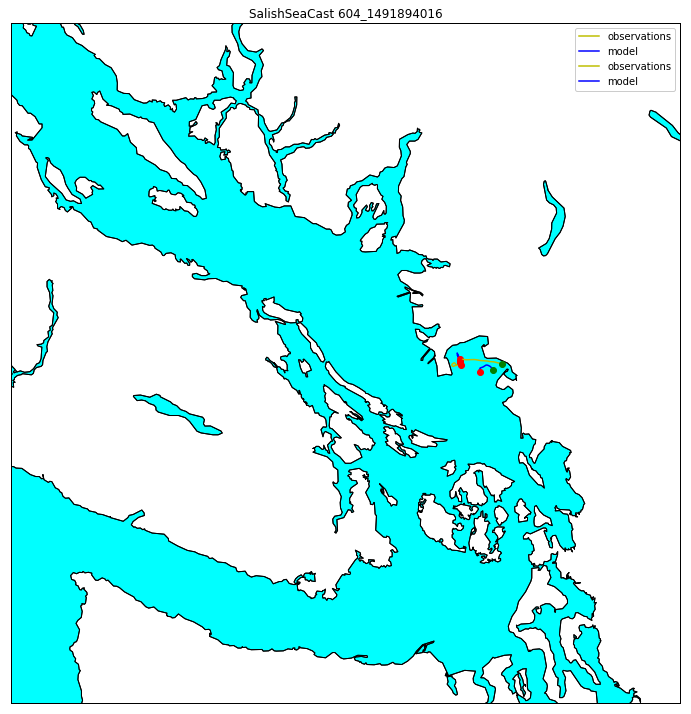

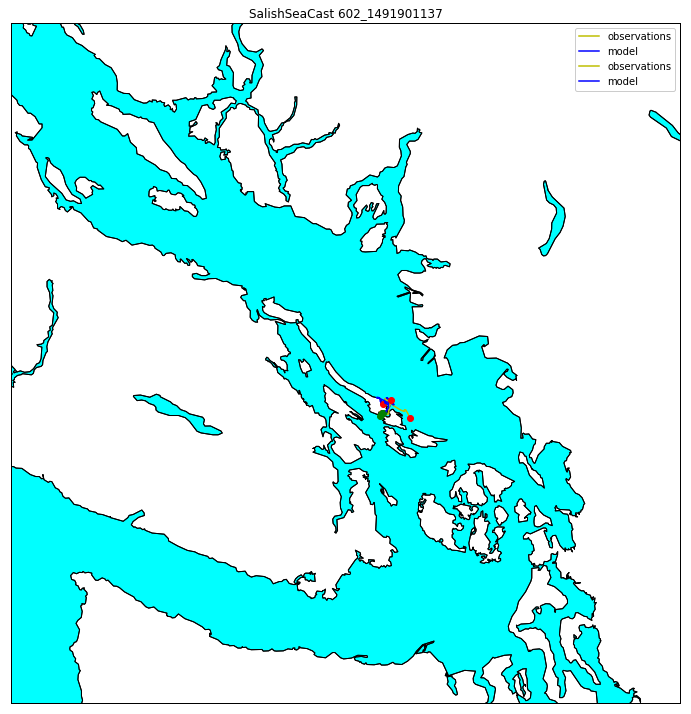

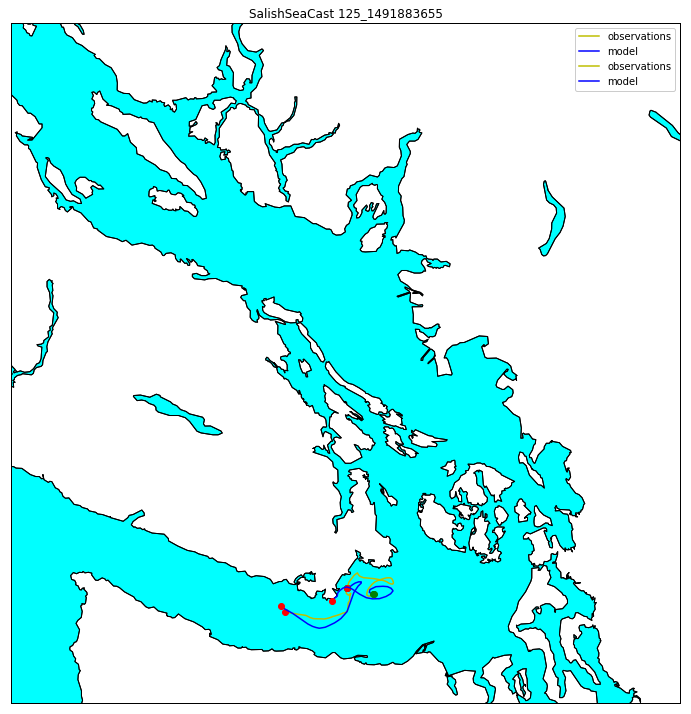

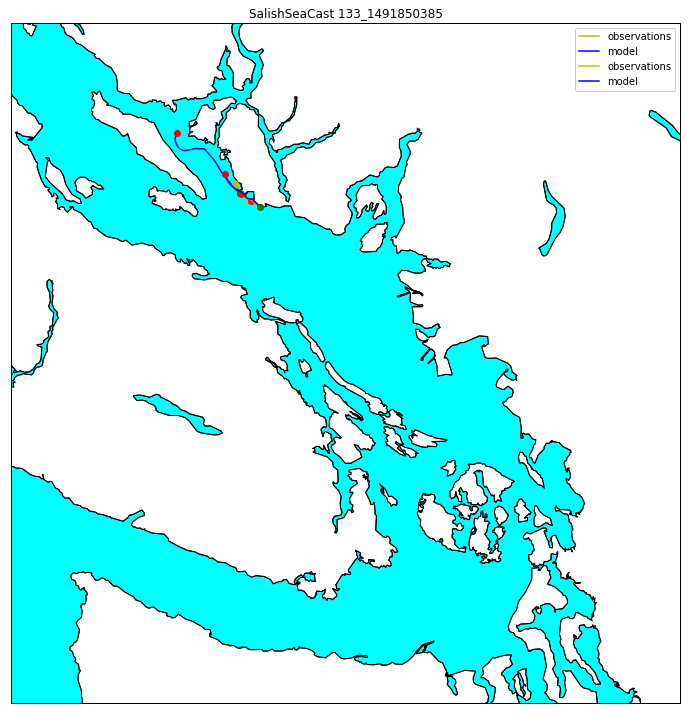

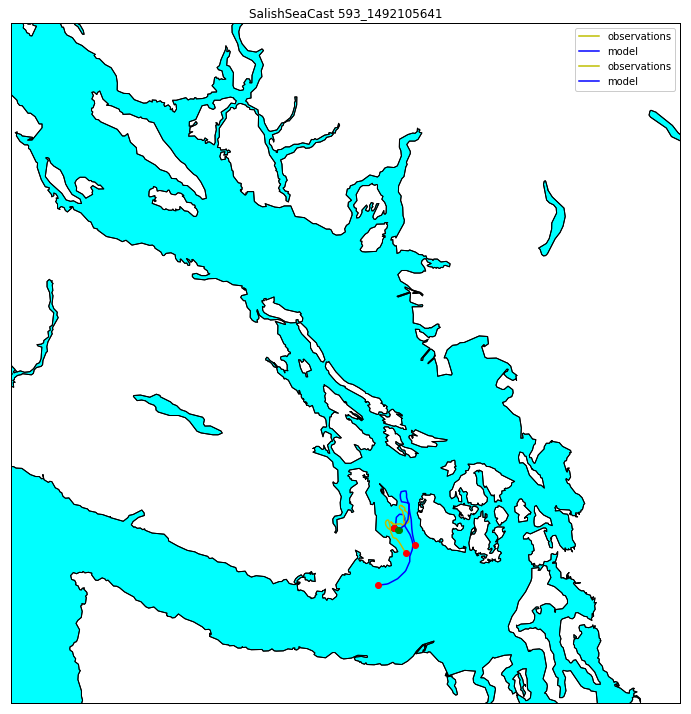

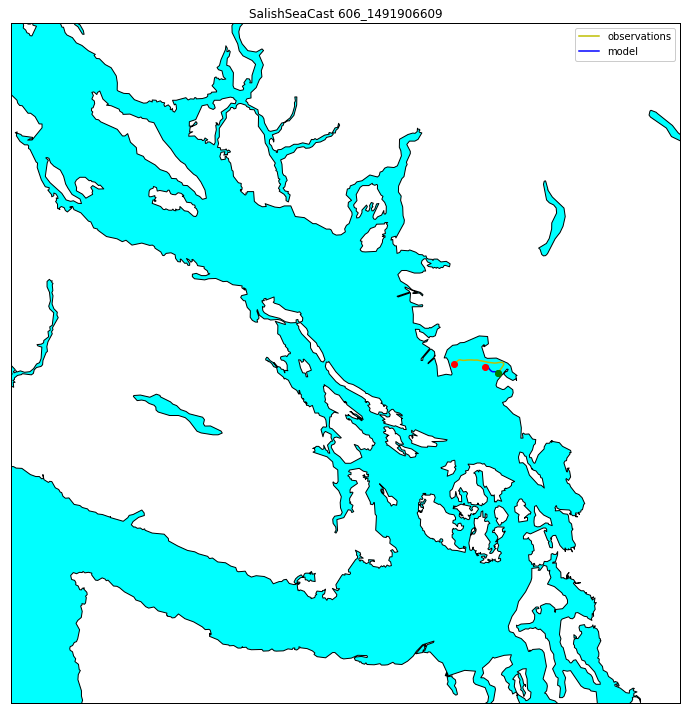

In [217]:
results_dir='/home/samuel/data/drift_tool_test/salish_test_20170416/output/'
filelist = []
for num in unique_list:
    filename = '*{}.nc'.format(num)
    files = glob.glob(os.path.join(results_dir, filename))
    filelist.append(files)
    fig, ax = plt.subplots(1,1)
    for file in files:
        plot_file(file)

In [216]:
def plot_file(fname):
    """Plot the modelled and observed trajector in a file fname"""
    m = Basemap(projection='merc',resolution='h',llcrnrlon=-125,llcrnrlat=48,urcrnrlon=-122,urcrnrlat=50)
    ds = xr.open_dataset(fname)
    m.drawcoastlines()
    plt.rcParams['figure.figsize'] = [12, 17]
    x, y = m(ds.obs_lon.values, ds.obs_lat.values)
    j,k = m(ds.mod_lon.values, ds.mod_lat.values)
    m.plot(x, y, c='y', label='observations')
    m.plot(x[0], y[0], 'go')
    m.plot(x[-1], y[-1], 'ro')
    m.plot(j, k, c='b', label='model')
    m.plot(j[0], k[0], 'go')
    m.plot(j[-1], k[-1], 'ro')
    m.drawmapboundary(fill_color='aqua')
    m.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
    m.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
    plt.title('{} {}'.format(ds.ocean_model, ds.obs_buoyid))
    plt.legend(framealpha=1, frameon=True);
    # fill continents, set lake color same as ocean color. 
    m.fillcontinents(color='white',lake_color='aqua')
    ds.close()

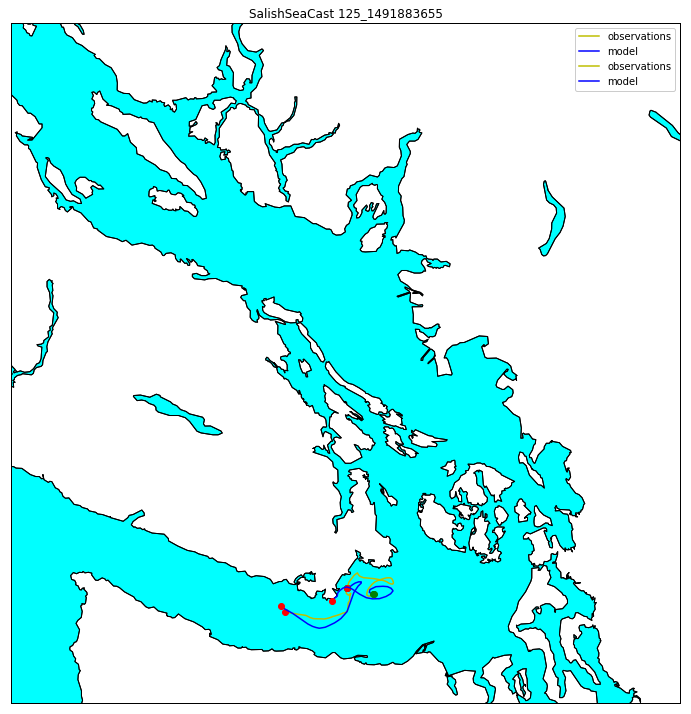

In [223]:
#You can get a specified plot from the files
for file in filelist[3]:
    plot_file(file)

In [ ]:
unique_id = ds.obs_unique_id
print(unique_id)
a = '*'
b = '.nc'
c = a+unique_id+b
print(c)
files = glob.glob(os.path.join(results_dir, c))